<a href="https://colab.research.google.com/github/iDhanush/_Ai_INTERNSHIP_ICTAK_/blob/main/final_final_final_Loan_prediction_ictak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
# Load training data
train_df = pd.read_csv('train_ctrUa4K.csv')
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


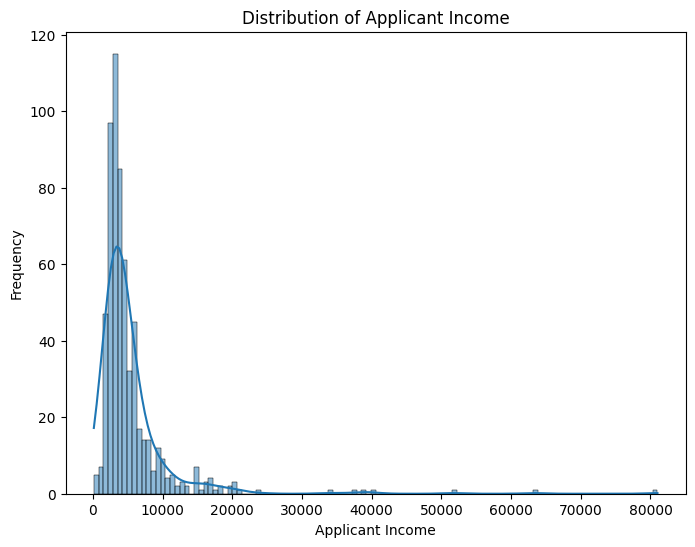

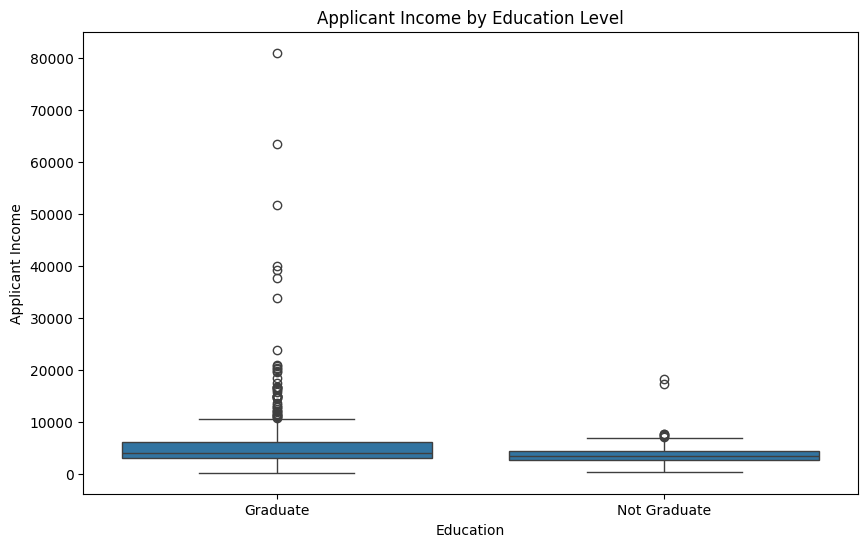

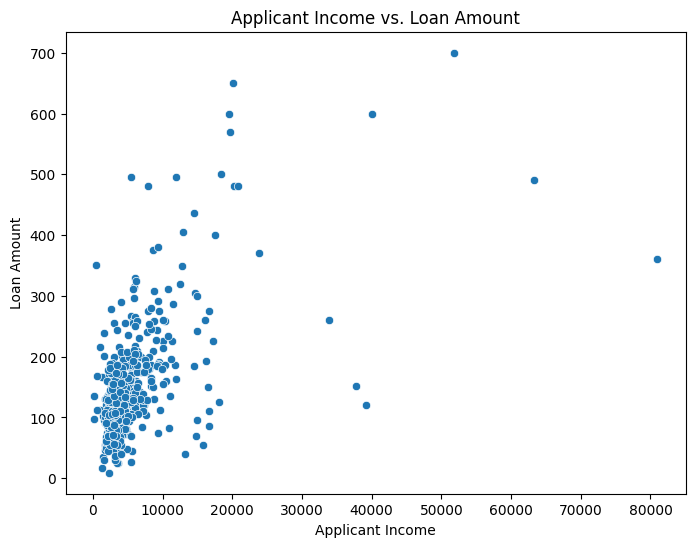

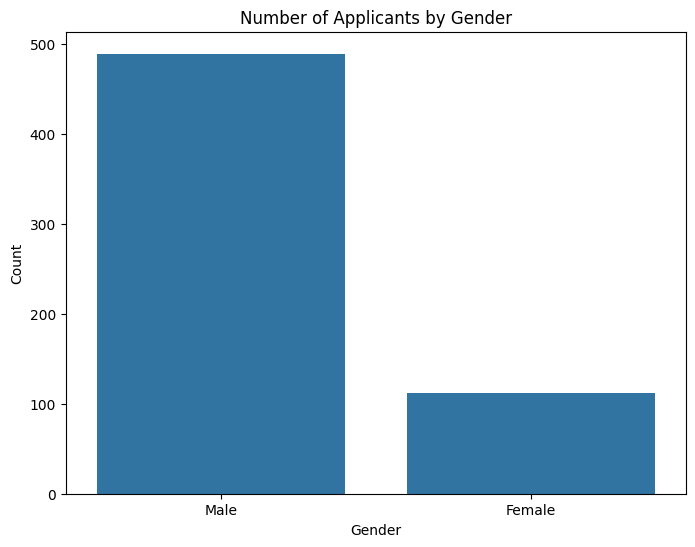

In [5]:
# Visualizations
# 1. Histogram of ApplicantIncome
plt.figure(figsize=(8, 6))
sns.histplot(train_df['ApplicantIncome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot of Applicant Income by Education
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='ApplicantIncome', data=train_df)
plt.title('Applicant Income by Education Level')
plt.xlabel('Education')
plt.ylabel('Applicant Income')
plt.show()

# 3. Scatter plot of Applicant Income vs. Loan Amount
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train_df)
plt.title('Applicant Income vs. Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# 4. Count plot of Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=train_df)
plt.title('Number of Applicants by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [6]:
# # prompt: find number of outliers in all  fill it with meidians  [ ''ApplicantIncome', Credit_History']

# for column in ['ApplicantIncome', 'Credit_History']:
#   # Calculate the IQR
#   Q1 = train_df[column].quantile(0.25)
#   Q3 = train_df[column].quantile(0.75)
#   IQR = Q3 - Q1

#   # Define the outlier boundaries
#   lower_bound = Q1 - 1.5 * IQR
#   upper_bound = Q3 + 1.5 * IQR

#   # Identify outliers
#   outliers = train_df[(train_df[column] < lower_bound) | (train_df[column] > upper_bound)]

#   # Count the number of outliers
#   num_outliers = len(outliers)
#   print(f"Number of outliers in {column}: {num_outliers}")

#   # Replace outliers with the median
#   median_value = train_df[column].median()
#   train_df[column] = np.where((train_df[column] < lower_bound) | (train_df[column] > upper_bound),
#                               median_value, train_df[column])

In [7]:
# Fill missing values
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    train_df[column].fillna(train_df[column].mode()[0], inplace=True)
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(), inplace=True)


<ipython-input-7-b48e9c830a1d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[column].fillna(train_df[column].mode()[0], inplace=True)
<ipython-input-7-b48e9c830a1d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [8]:
# Encode categorical variables
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    train_df[column] = label_encoder.fit_transform(train_df[column])

In [9]:
# Map target variable 'Loan_Status' to binary
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})

In [10]:
# Separate features and target
X = train_df.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_df['Loan_Status']

In [11]:
# # Scale numerical features
scaler = StandardScaler()
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])


In [12]:
# prompt: train the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{confusion_mat}")

Accuracy: 0.7723577235772358
Confusion Matrix:
[[18 25]
 [ 3 77]]


In [13]:
testdf = pd.read_csv('test_lAUu6dG.csv')
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
# prompt: from test_1AU...csv get predictions and give output file with feilds Loan_ID and Loan_Status
# Fill missing values in test data (similar to training data)
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']:
    testdf[column].fillna(testdf[column].mode()[0], inplace=True)

testdf['LoanAmount'].fillna(testdf['LoanAmount'].median(), inplace=True)
testdf['Loan_Amount_Term'].fillna(testdf['Loan_Amount_Term'].median(), inplace=True)


# Encode categorical variables in test data
label_encoder = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
    testdf[column] = label_encoder.fit_transform(testdf[column])


# Prepare test data for prediction
X_test = testdf.drop(columns=['Loan_ID'])  # Remove Loan_ID as it's not a feature

# Scale numerical features in test data using the same scaler fitted on training data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Create a new DataFrame with Loan_ID and predicted Loan_Status
submission_df = pd.DataFrame({'Loan_ID': testdf['Loan_ID'], 'Loan_Status': y_pred_test})

# Map the predicted Loan_Status back to 'Y' and 'N'
submission_df['Loan_Status'] = submission_df['Loan_Status'].map({1: 'Y', 0: 'N'})


# Save the predictions to a CSV file
submission_df.to_csv('loan_prediction_submission.csv', index=False)

print("Predictions saved to loan_prediction_submission.csv")

<ipython-input-14-1e381be65741>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdf[column].fillna(testdf[column].mode()[0], inplace=True)
<ipython-input-14-1e381be65741>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

Predictions saved to loan_prediction_submission.csv
